In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import logging
from datetime import datetime

# Initialize logging
log_filename = f'../logs/metrics_log_{datetime.now().strftime("%Y-%m-%d")}.txt'
logging.basicConfig(filename=log_filename, level=logging.INFO, format='%(asctime)s:%(levelname)s:%(message)s')

# Function Definitions
def load_data(file_path):
    return pd.read_csv(file_path)

def simulate_data_drift(data, drift_factor=0.05):
    drifted_data = data.copy()
    for col in drifted_data.columns:
        drifted_data[col] += np.random.randn(*drifted_data[col].shape) * drift_factor * drifted_data[col].std()
    return drifted_data

def calculate_and_log_metrics(X, labels_pred, results_path):
    silhouette = silhouette_score(X, labels_pred)
    davies_bouldin = davies_bouldin_score(X, labels_pred)
    calinski_harabasz = calinski_harabasz_score(X, labels_pred)
    
    logging.info(f"Metrics - Silhouette: {silhouette}, Davies-Bouldin: {davies_bouldin}, Calinski-Harabasz: {calinski_harabasz}")
    
    results_df = pd.DataFrame({
        'Silhouette Score': [silhouette],
        'Davies-Bouldin Index': [davies_bouldin],
        'Calinski-Harabasz Index': [calinski_harabasz]
    })
    results_df.to_csv(results_path, mode='a', header=not os.path.exists(results_path), index=False)

def perform_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels_pred = kmeans.fit_predict(data)
    return labels_pred

def main():
    # Configuration
    DATASET_FILE_PATH = '../data/processed/s1.txt'
    RESULTS_PATH = '../results/metrics/results.csv'
    N_CLASSES = 15
    DRIFT_FACTOR = 0.05  # Adjust based on your needs

    # Load data
    data = load_data(DATASET_FILE_PATH)

    # Initial clustering
    labels_pred = perform_clustering(data, N_CLASSES)
    calculate_and_log_metrics(data, labels_pred, RESULTS_PATH)

    # Simulate data drift and re-evaluate
    data_drifted = simulate_data_drift(data, DRIFT_FACTOR)
    labels_pred_drifted = perform_clustering(data_drifted, N_CLASSES)
    calculate_and_log_metrics(data_drifted, labels_pred_drifted, RESULTS_PATH)

    logging.info("Completed clustering and metric evaluation with simulated data drift.")

if __name__ == "__main__":
    main()


C:\Users\akila\anaconda3\envs\minor-thesis-9\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akila\anaconda3\envs\minor-thesis-9\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=2: Silhouette=0.3841312497039832, Davies-Bouldin=1.137093585057827, Calinski-Harabasz=3211.6774678998145
k=3: Silhouette=0.41509877430045344, Davies-Bouldin=0.8436094389457001, Calinski-Harabasz=4240.571062093543
k=4: Silhouette=0.4453509709061886, Davies-Bouldin=0.769141554793314, Calinski-Harabasz=5253.913295133928
k=5: Silhouette=0.4670850456458704, Davies-Bouldin=0.7298633391670049, Calinski-Harabasz=5622.297986000843
k=6: Silhouette=0.4982683850341049, Davies-Bouldin=0.7537776386760643, Calinski-Harabasz=6277.9501482602545
k=7: Silhouette=0.526769556957557, Davies-Bouldin=0.6532363300250245, Calinski-Harabasz=6711.348561937682
k=8: Silhouette=0.5629730486993177, Davies-Bouldin=0.6976127327123901, Calinski-Harabasz=7733.1381549081025
k=9: Silhouette=0.5805620721378992, Davies-Bouldin=0.6120568786728763, Calinski-Harabasz=8215.223213049141
k=10: Silhouette=0.5953884834041858, Davies-Bouldin=0.563164442978425, Calinski-Harabasz=8504.771304310549
k=11: Silhouette=0.5995603613328642,

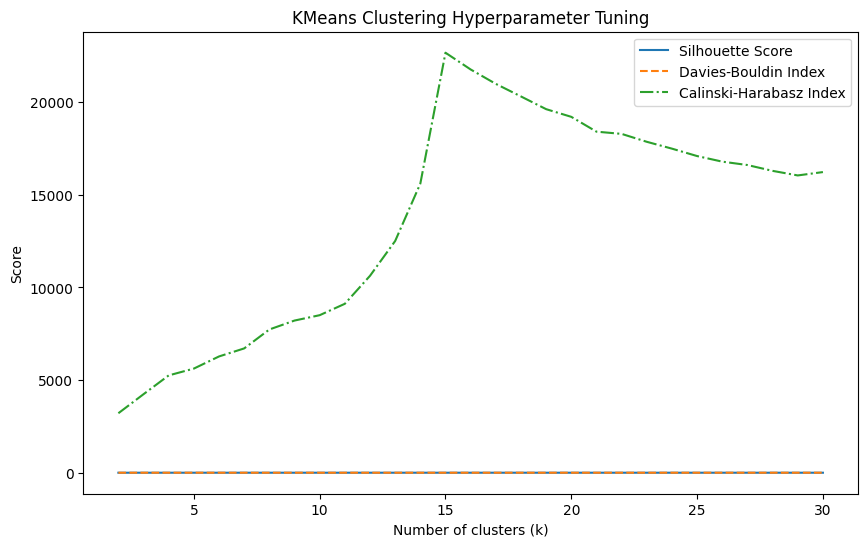

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

# Your code here

# Configuration
DATA_FILE_PATH = '../data/processed/s1.txt'  # Update this path
RESULTS_PATH = '../results/metrics'  # Ensure this directory exists
PLOT_RESULTS = True  # Set to False if you do not wish to generate plots

# Load and preprocess data
def load_and_preprocess_data(filepath):
    data = pd.read_csv(filepath)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Main function for hyperparameter tuning
def tune_kmeans_hyperparameter(data, k_range, results_path, plot_results=True):
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []
    
    for k in k_range:
        # Clustering with KMeans
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        
        # Compute metrics
        silhouette = silhouette_score(data, labels)
        davies_bouldin = davies_bouldin_score(data, labels)
        calinski_harabasz = calinski_harabasz_score(data, labels)
        
        # Append metrics to lists
        silhouette_scores.append(silhouette)
        davies_bouldin_scores.append(davies_bouldin)
        calinski_harabasz_scores.append(calinski_harabasz)
        
        print(f"k={k}: Silhouette={silhouette}, Davies-Bouldin={davies_bouldin}, Calinski-Harabasz={calinski_harabasz}")
    
    # Save results to a CSV
    results_df = pd.DataFrame({
        'k': k_range,
        'Silhouette Score': silhouette_scores,
        'Davies-Bouldin Index': davies_bouldin_scores,
        'Calinski-Harabasz Index': calinski_harabasz_scores
    })
    results_df.to_csv(os.path.join(results_path, 'kmeans_tuning_results.csv'), index=False)
    
    # Plot results if enabled
    if plot_results:
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, silhouette_scores, label='Silhouette Score')
        plt.plot(k_range, davies_bouldin_scores, label='Davies-Bouldin Index', linestyle='--')
        plt.plot(k_range, calinski_harabasz_scores, label='Calinski-Harabasz Index', linestyle='-.')
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Score')
        plt.title('KMeans Clustering Hyperparameter Tuning')
        plt.legend()
        plt.savefig(os.path.join(results_path, 'kmeans_tuning_plot.png'))
        plt.show()

if __name__ == "__main__":
    data_scaled = load_and_preprocess_data(DATA_FILE_PATH)
    k_range = range(2, 31)  # Adjust based on your needs
    tune_kmeans_hyperparameter(data_scaled, k_range, RESULTS_PATH, PLOT_RESULTS)


k=2: Silhouette=0.3841312497039832, Davies-Bouldin=1.137093585057827, Calinski-Harabasz=3211.6774678998145
k=3: Silhouette=0.41509877430045344, Davies-Bouldin=0.8436094389457001, Calinski-Harabasz=4240.571062093543
k=4: Silhouette=0.4453509709061886, Davies-Bouldin=0.769141554793314, Calinski-Harabasz=5253.913295133928
k=5: Silhouette=0.4670850456458704, Davies-Bouldin=0.7298633391670049, Calinski-Harabasz=5622.297986000843
k=6: Silhouette=0.4982683850341049, Davies-Bouldin=0.7537776386760643, Calinski-Harabasz=6277.9501482602545
k=7: Silhouette=0.526769556957557, Davies-Bouldin=0.6532363300250245, Calinski-Harabasz=6711.348561937682
k=8: Silhouette=0.5629730486993177, Davies-Bouldin=0.6976127327123901, Calinski-Harabasz=7733.1381549081025
k=9: Silhouette=0.5805620721378992, Davies-Bouldin=0.6120568786728763, Calinski-Harabasz=8215.223213049141
k=10: Silhouette=0.5953884834041858, Davies-Bouldin=0.563164442978425, Calinski-Harabasz=8504.771304310549
k=11: Silhouette=0.5995603613328642,

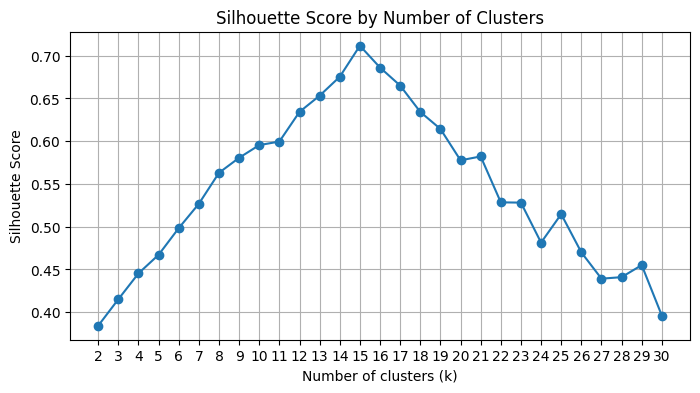

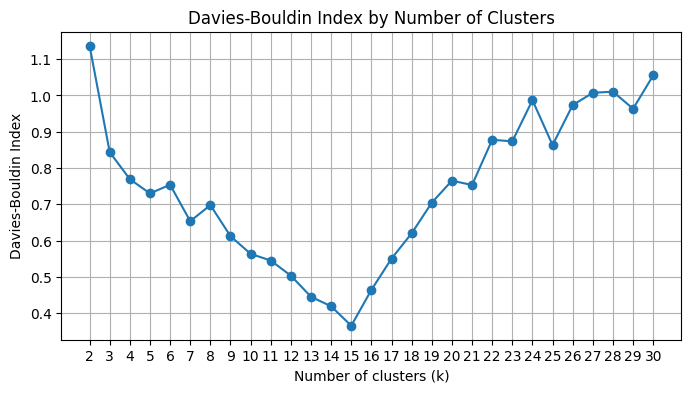

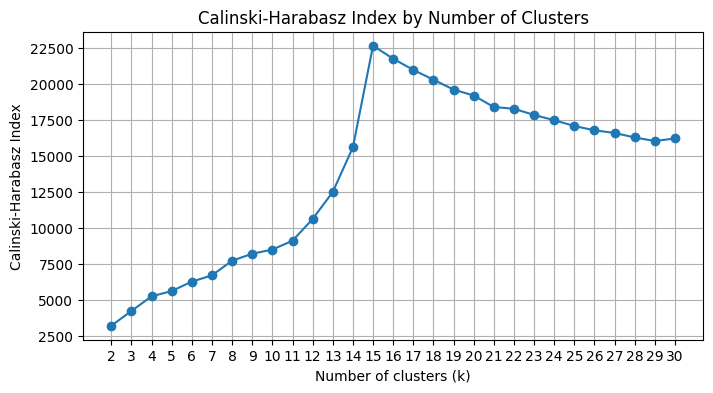

Optimal k based on Silhouette Score: 15
Optimal k based on Davies-Bouldin Index: 15 (lower is better)
Optimal k based on Calinski-Harabasz Index: 15


In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

# Configuration
DATA_FILE_PATH = '../data/processed/s1.txt'  # Update this path
RESULTS_PATH = '../results/metrics'  # Ensure this directory exists
PLOT_RESULTS = True  # Set to False if you do not wish to generate plots

def plot_metrics(k_range, metrics_scores, metric_name, results_path):
    plt.figure(figsize=(8, 4))
    plt.plot(k_range, metrics_scores, marker='o', linestyle='-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} by Number of Clusters')
    plt.xticks(k_range)
    plt.grid(True)
    plt.savefig(os.path.join(results_path, f'{metric_name.replace(" ", "_")}_plot.png'))
    plt.show()


def load_and_preprocess_data(filepath):
    data = pd.read_csv(filepath)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

def tune_kmeans_hyperparameter(data, k_range, results_path, plot_results=True):
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        
        silhouette = silhouette_score(data, labels)
        davies_bouldin = davies_bouldin_score(data, labels)
        calinski_harabasz = calinski_harabasz_score(data, labels)
        
        silhouette_scores.append(silhouette)
        davies_bouldin_scores.append(davies_bouldin)
        calinski_harabasz_scores.append(calinski_harabasz)
        
        print(f"k={k}: Silhouette={silhouette}, Davies-Bouldin={davies_bouldin}, Calinski-Harabasz={calinski_harabasz}")
    
    results_df = pd.DataFrame({
        'k': k_range,
        'Silhouette Score': silhouette_scores,
        'Davies-Bouldin Index': davies_bouldin_scores,
        'Calinski-Harabasz Index': calinski_harabasz_scores
    })
    results_df.to_csv(os.path.join(results_path, 'kmeans_tuning_results.csv'), index=False)
    
    # Plot results if enabled
    if plot_results:
        plot_metrics(k_range, silhouette_scores, 'Silhouette Score', RESULTS_PATH)
        plot_metrics(k_range, davies_bouldin_scores, 'Davies-Bouldin Index', RESULTS_PATH)
        plot_metrics(k_range, calinski_harabasz_scores, 'Calinski-Harabasz Index', RESULTS_PATH)

    optimal_k_silhouette = k_range[silhouette_scores.index(max(silhouette_scores))]
    optimal_k_davies = k_range[davies_bouldin_scores.index(min(davies_bouldin_scores))]
    optimal_k_calinski = k_range[calinski_harabasz_scores.index(max(calinski_harabasz_scores))]
    
    print(f"Optimal k based on Silhouette Score: {optimal_k_silhouette}")
    print(f"Optimal k based on Davies-Bouldin Index: {optimal_k_davies} (lower is better)")
    print(f"Optimal k based on Calinski-Harabasz Index: {optimal_k_calinski}")

if __name__ == "__main__":
    data_scaled = load_and_preprocess_data(DATA_FILE_PATH)
    k_range = range(2, 31)  # Adjust based on your needs
    tune_kmeans_hyperparameter(data_scaled, k_range, RESULTS_PATH, PLOT_RESULTS)
